<a href="https://colab.research.google.com/github/Pooooj/Supervised-learning-Regression-Model/blob/main/Supervised_learning_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Importing using Google Colab

# Connecting Google Drive to this Python notebook
from google.colab import drive
drive.mount('/content/drive')

#loading the data set, make sure to include the full path to the file in your Drive
df = pd.read_csv("/content/drive/MyDrive/Linear Regression/anime_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#display the first 5 rows
df.head()


,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#shape of data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 12101 rows and 44 columns.


In [33]:
data = df.copy()
data.info()
data.duplicated().sum() #checking for duplicates
print(f"There are {data.duplicated().sum()} duplicated rows.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

In [13]:
#Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
# Displaying column names of the DataFrame
print(data.columns)

# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Filling missing values in 'title' and 'description' if they exist
if 'title' in data.columns and 'description' in data.columns:
    data['title'].fillna('Unknown', inplace=True)
    data['description'].fillna('Unknown', inplace=True)

# Filling missing values in numerical columns with the mean of the respective column
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].mean(), inplace=True)

# Displaying the shape of the data after filling missing values
print(data.shape)

# Dropping 'title' and 'description' columns if they exist
if 'title' in data.columns and 'description' in data.columns:
    data.drop(["title", "description"], axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
print(data.head())


Index(['mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease',
       'years_running', 'studio_primary', 'studios_colab', 'contentWarn',
       'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes',
       'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action', 'tag_Fantasy',
       'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_pr

**Exploratory Data Analysis**

- The target variable (`rating`) is of *float* type.
- `title`, `description`, `mediaType`, `sznOfRelease`, and `studio_primary` are of *object* type.
- `ongoing` column is of *bool* type.
- All other columns are numeric in nature.
- The `title` and `description` columns are dropped for modeling as they are highly textual in nature.
- There are no duplicate values in the data.
- There are missing values in the data. The rows with missing data have been dropped.

In [36]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [37]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

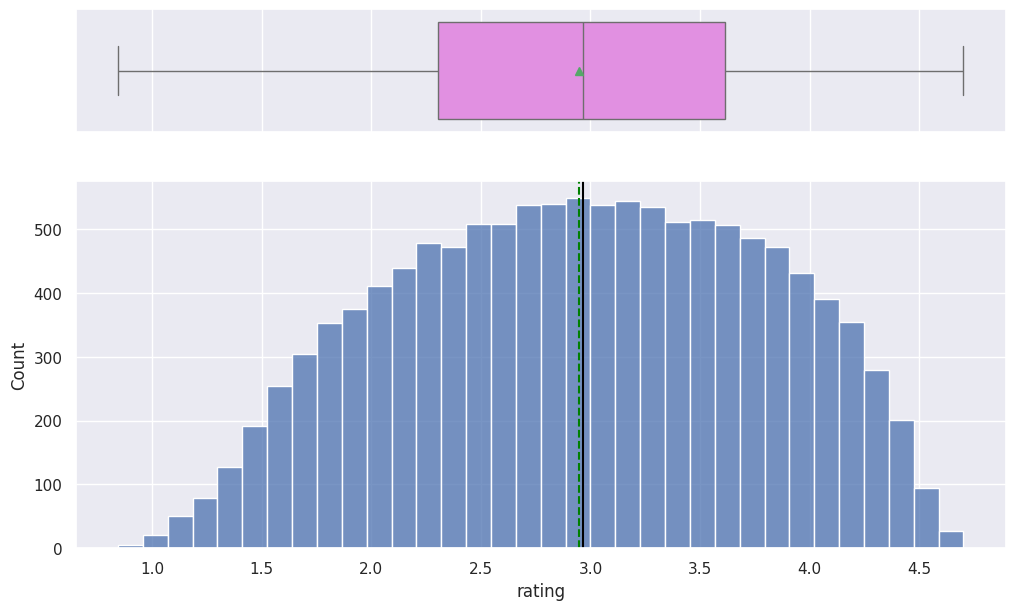

In [38]:
#Rating
histogram_boxplot(data, "rating")

<ipython-input-36-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


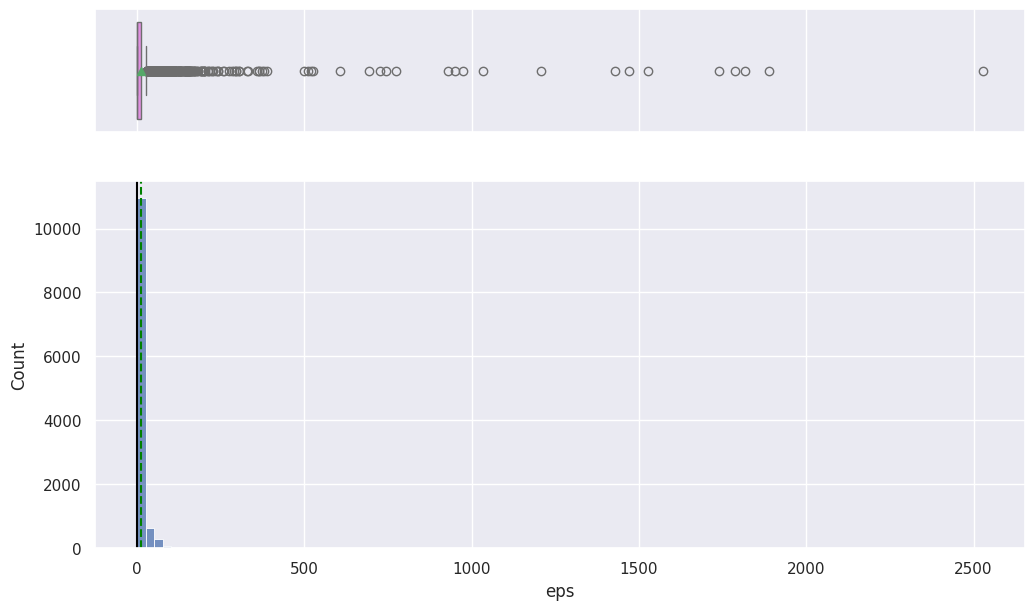

In [39]:
#EPS
histogram_boxplot(data, "eps", bins=100)

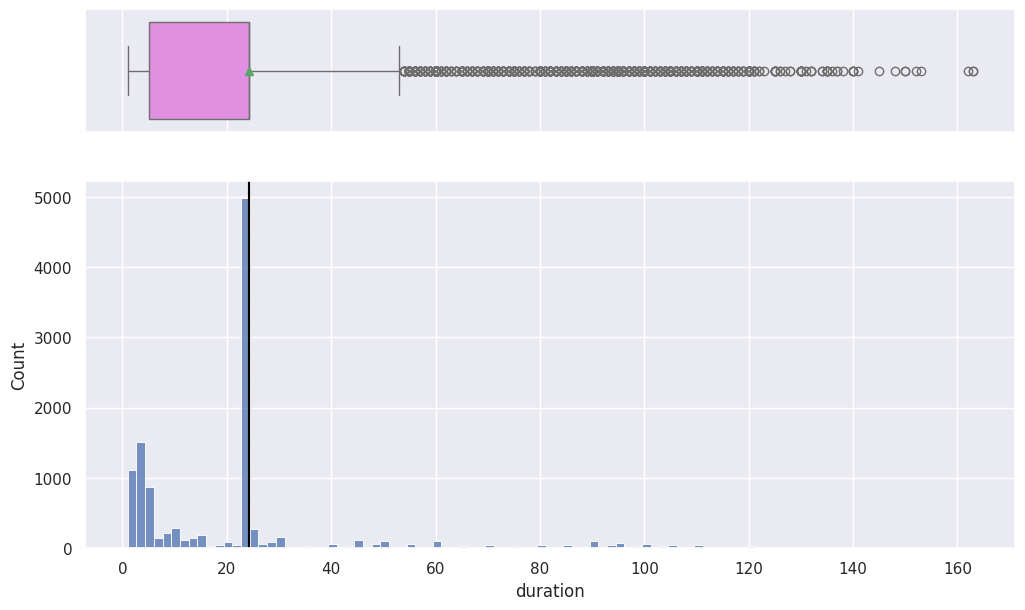

In [41]:
#Duration
histogram_boxplot(data, "duration")

<ipython-input-37-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


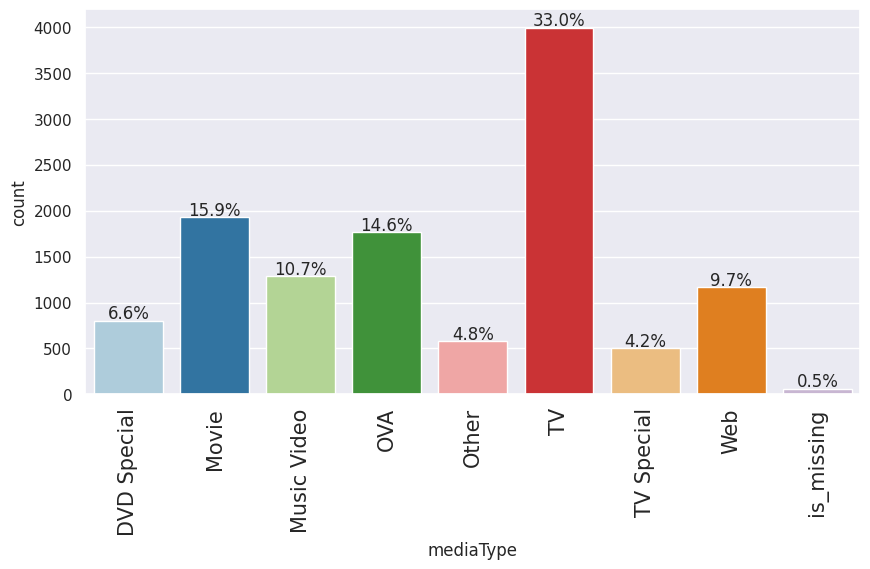

In [43]:
#Media Type
labeled_barplot(data, "mediaType", perc=True)

<ipython-input-37-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


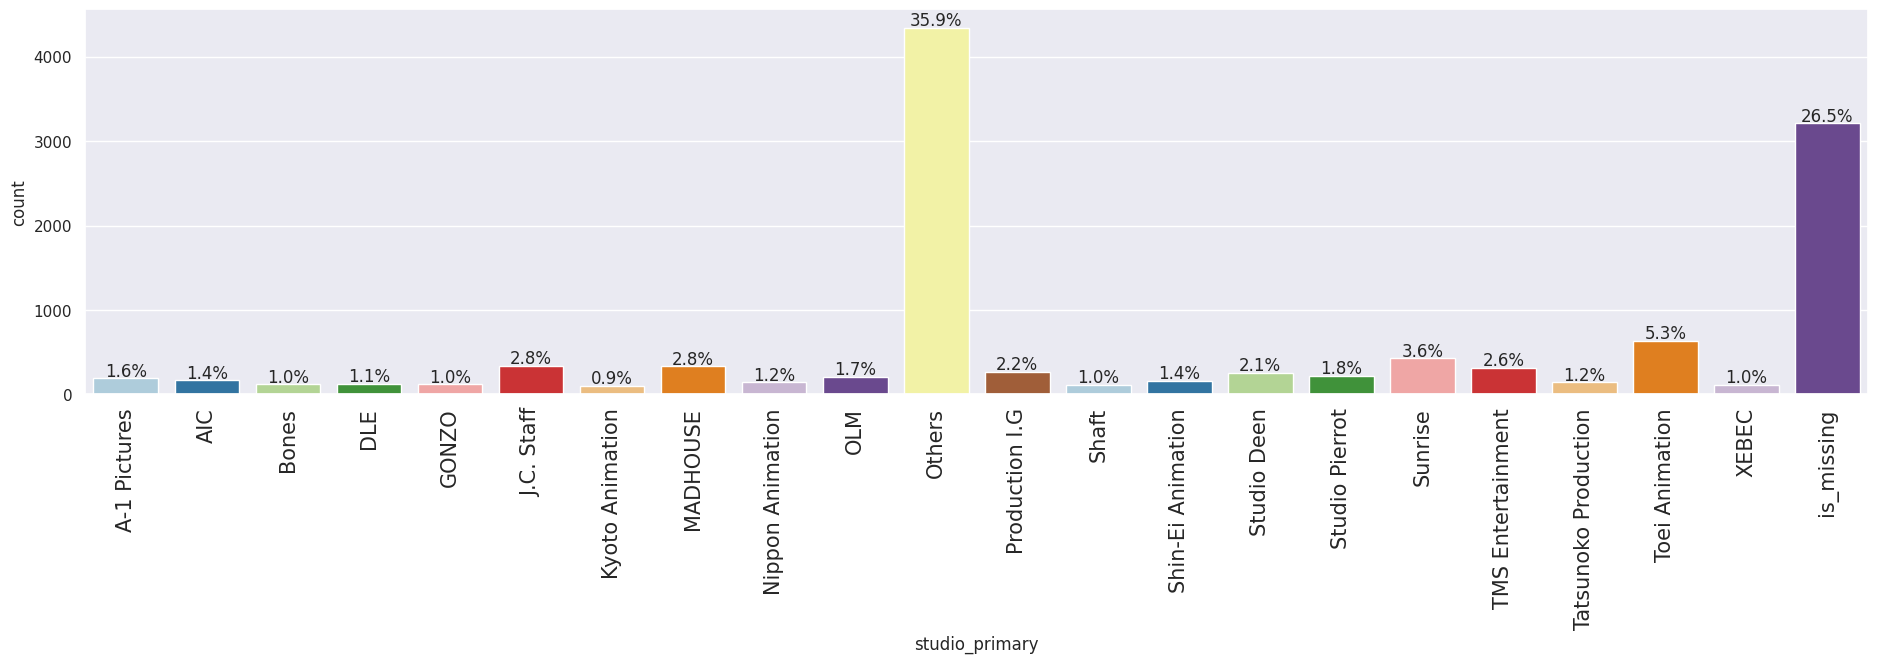

In [44]:
#Studio Primary
labeled_barplot(data, "studio_primary", perc=True)

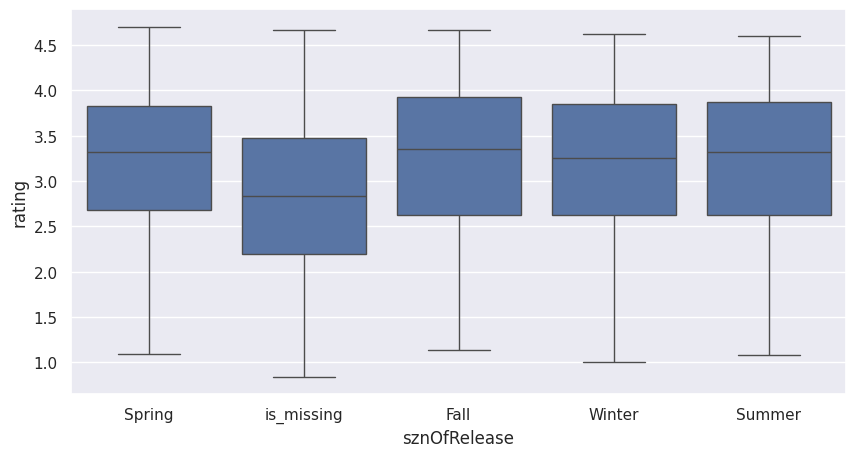

In [45]:
#Comparing szn of Release with rating
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=data)
plt.show()

In [55]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # Import train_test_split
import pandas as pd
import numpy as np

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


# Replace 'rating' with the name of your target variable column
X = data.drop('rating', axis=1)  # Replace 'rating' with the actual column name
y = data['rating']  # Replace 'rating' with the actual column name

# Handle non-numeric columns (e.g., one-hot encoding or dropping)
X = pd.get_dummies(X, columns=['mediaType', 'studio_primary', 'sznOfRelease'], drop_first=True) # One-hot encode categorical columns

# Replace 'is_missing' with numerical values (e.g., 1 for True, 0 for False)
X = X.replace('is_missing', 1)  # Assuming 'is_missing' represents True
X = X.replace(np.nan, 0)       # Assuming other missing values are represented as NaN

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
print(lin_reg_model_train_perf)

# Checking model performance on test set
print("Testing Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
print(lin_reg_model_test_perf)

Training Performance

       RMSE      MAE  R-squared  Adj. R-squared       MAPE
0  0.565894  0.45592   0.533457         0.53001  17.893963
Testing Performance

       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.561416  0.454752   0.533887        0.519798  17.461094
